In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 

In [4]:
df = pd.read_csv(f'/Users/shuprov630/Desktop/Data/Datasets and Miscelleneous/Health_Sleep_Statistics.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [5]:
df.size

1200

In [6]:
df.columns.size

12

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [8]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [9]:
df.isna().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(["User ID"], axis=1, inplace=True)

In [12]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


**Age vs sleep quality analysis**

In [13]:
age_sleep_quality_corr = df[['Age', 'Sleep Quality']]. corr()
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [14]:
age_sleep_quality_corr['Age']

Age              1.000000
Sleep Quality   -0.848356
Name: Age, dtype: float64

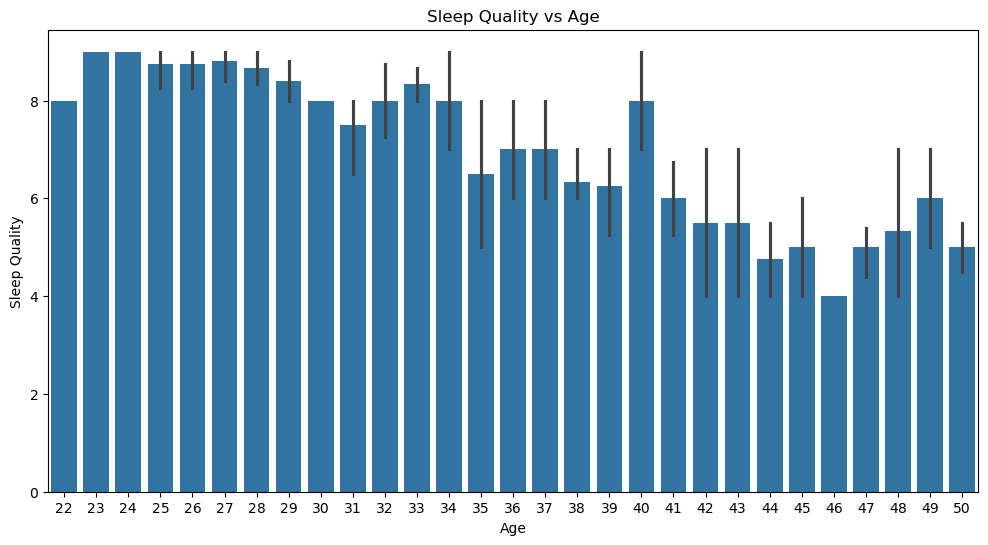

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Age', y = 'Sleep Quality', data=df)
plt.title('Sleep Quality vs Age')
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model = LinearRegression()

x = df[['Age']]
y = df['Sleep Quality']

age_sleep_quality_model.fit(x,y)

LinearRegression()

In [17]:
age_sleep_quality_model.intercept_

13.26881202319065

In [18]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [19]:
age_sleep_quality_predictions = age_sleep_quality_model.predict(x)

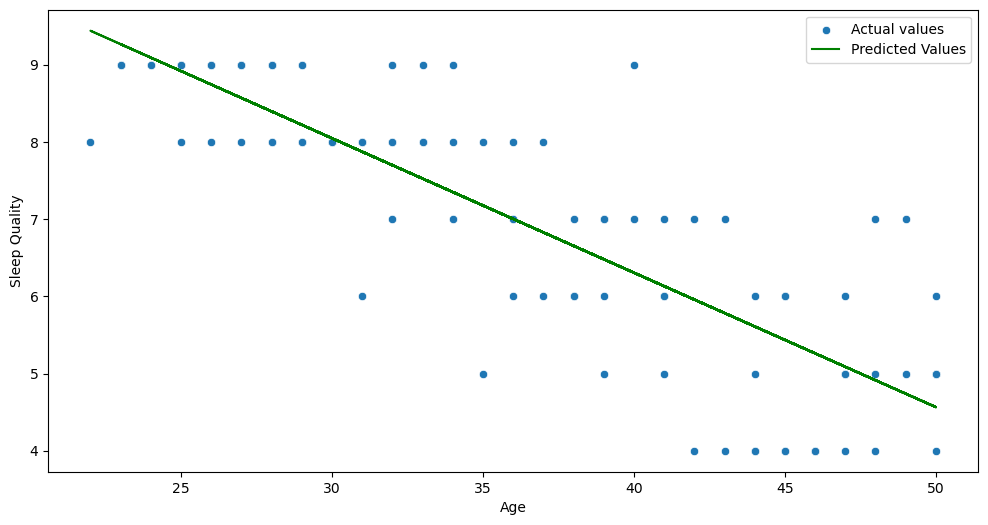

In [20]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Age', y = 'Sleep Quality', data = df, label = 'Actual values')
plt.plot(x, age_sleep_quality_predictions, color ='green', label = "Predicted Values")
plt.legend()
plt.show()
                 

**Physical Activity vs Sleep Quality**

In [21]:
df['Physical Activity Level']. head()

0    medium
1       low
2      high
3       low
4      high
Name: Physical Activity Level, dtype: object

In [22]:
df['Sleep Quality'].head()

0    8
1    7
2    9
3    5
4    8
Name: Sleep Quality, dtype: int64

In [23]:
df['Gender']. head()

0    f
1    m
2    f
3    m
4    f
Name: Gender, dtype: object

<Axes: xlabel='Gender', ylabel='Sleep Quality'>

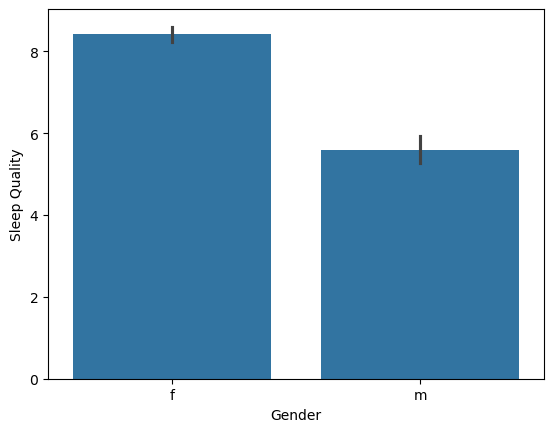

In [24]:
sns.barplot(x = "Gender", y = "Sleep Quality", data = df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

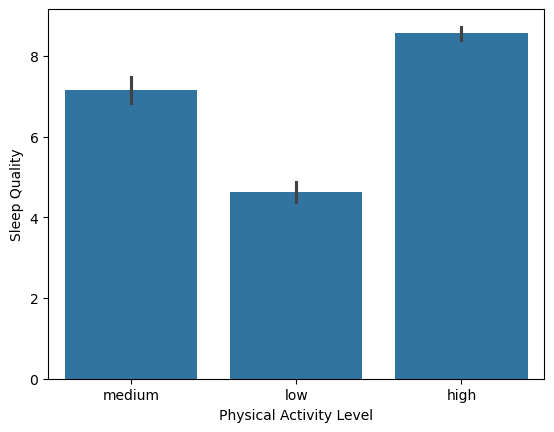

In [25]:
sns.barplot(x = "Physical Activity Level", y = "Sleep Quality", data = df)

In [26]:
custom_codes = {'low': 1, 'medium': 2, 'high': 3}

df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_codes)
df['Physical Activity Level'].head()

0    2
1    1
2    3
3    1
4    3
Name: Physical Activity Level, dtype: int64

<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

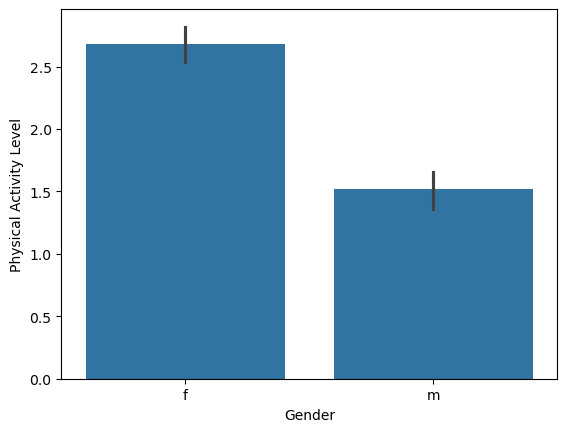

In [27]:
sns.barplot(x = 'Gender', y = "Physical Activity Level", data = df)

*T and P values for sleep Quality vs Gender & physical activity vs Gender*

In [28]:
from scipy import stats

sleep_quality_males = df[df['Gender'] == 'm']['Sleep Quality']
sleep_quality_females = df[df['Gender'] == 'f']['Sleep Quality']

physical_activity_males = df[df['Gender'] == 'm']['Physical Activity Level']
physical_activity_females = df[df['Gender'] =='f']['Physical Activity Level'] 

In [30]:
t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_males, sleep_quality_females)

print(f"t_stats value for Sleep Quality vs Gender: {t_sleep_quality:.2f}")
print(f"t_stats value for Sleep Quality vs Gender: {p_sleep_quality:.2f}")

t_stats value for Sleep Quality vs Gender: -14.32
t_stats value for Sleep Quality vs Gender: 0.00


In [31]:
t_physical_activity, p_physical_activity = stats.ttest_ind(physical_activity_males, physical_activity_females)

print(f"t_stats value for Physical Activity vs Gender: {t_physical_activity:.2f}")
print(f"t_stats value for Physical Activity vs Gender: {p_physical_activity:.2f}")

t_stats value for Physical Activity vs Gender: -10.98
t_stats value for Physical Activity vs Gender: 0.00


## **Time of Sleep & Waking up vs Sleep Quality**

In [32]:
df['Bedtime'].head()

0    23:00
1    00:30
2    22:45
3    01:00
4    23:30
Name: Bedtime, dtype: object

In [33]:
df['Wake-up Time'].head()

0    06:30
1    07:00
2    06:45
3    06:30
4    07:00
Name: Wake-up Time, dtype: object

In [35]:
def sleep_time_helper_function(str_time):
    h = str_time.split(":")[0]
    m = str_time.split(":")[1]

    return int(h) + int(m)/60

df['Bedtime'] = df['Bedtime'].apply(sleep_time_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_time_helper_function)

In [36]:
df['Bedtime'].head()

0    23.00
1     0.50
2    22.75
3     1.00
4    23.50
Name: Bedtime, dtype: float64

In [37]:
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime']) % 24
df['Sleep Duration Hours'].head()


0    7.5
1    6.5
2    8.0
3    5.5
4    7.5
Name: Sleep Duration Hours, dtype: float64

In [38]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

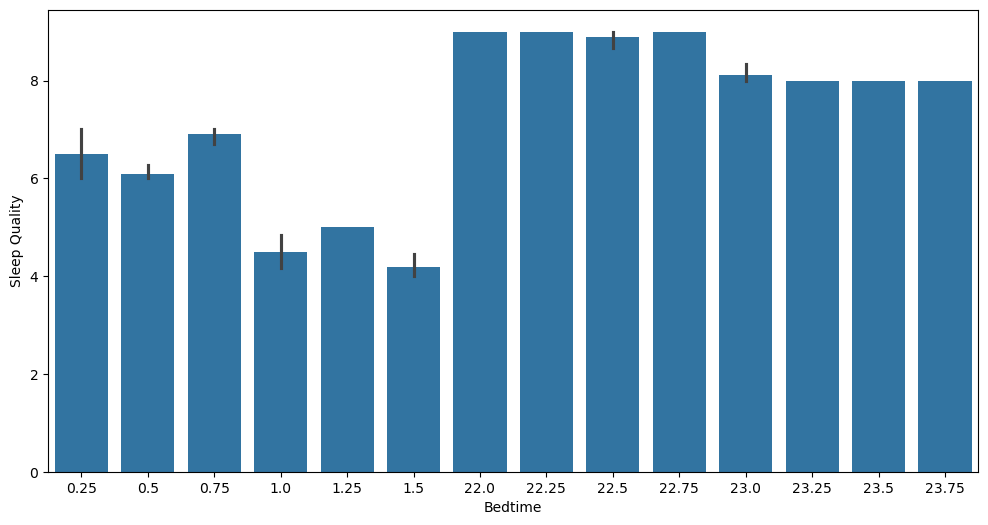

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='Bedtime', y='Sleep Quality', data = df)

<Axes: xlabel='Wake-up Time', ylabel='Sleep Quality'>

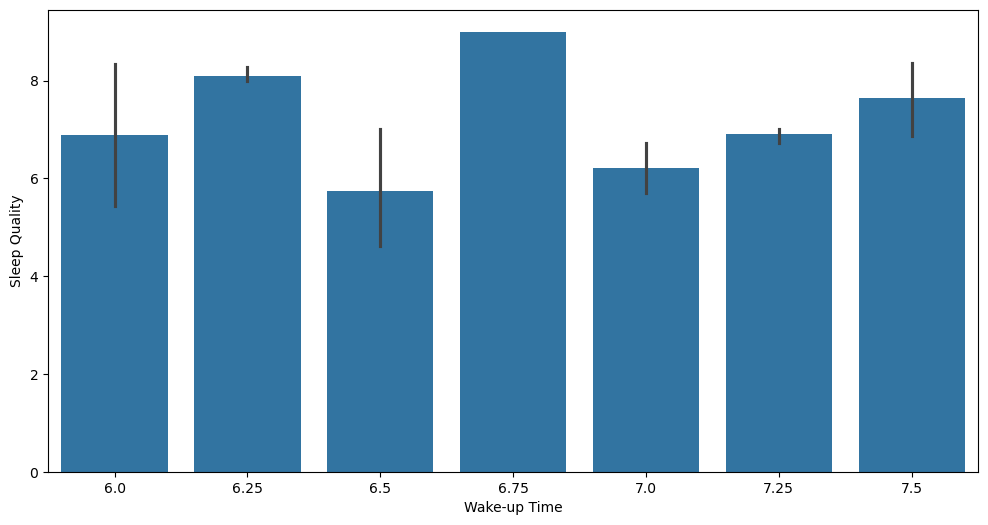

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x='Wake-up Time', y='Sleep Quality', data = df)

<Axes: xlabel='Sleep Duration Hours', ylabel='Sleep Quality'>

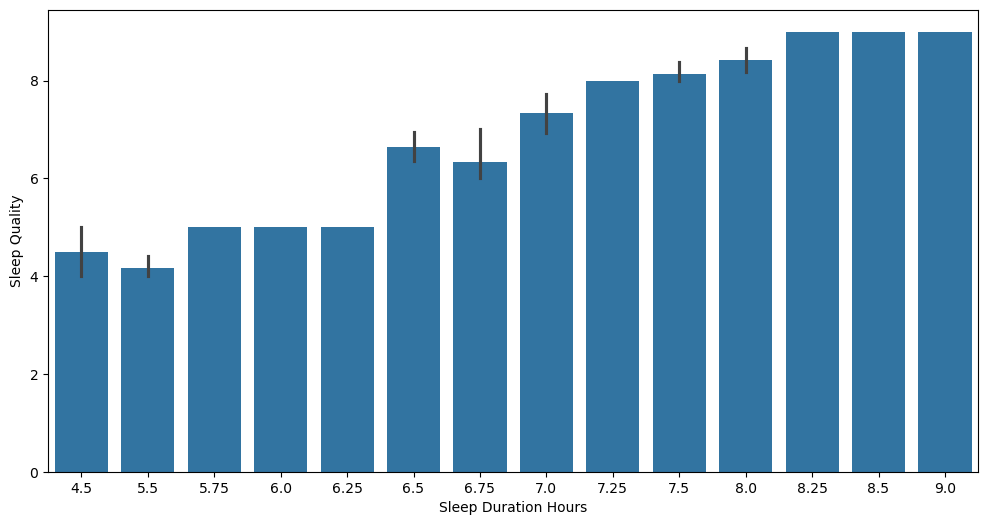

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='Sleep Duration Hours', y='Sleep Quality', data = df)

In [43]:
sleep_duration_quality_model = LinearRegression()

x = df[['Sleep Duration Hours']]
y = df['Sleep Quality']

sleep_duration_quality_model.fit(x,y)

LinearRegression()

In [44]:
sleep_duration_quality_model.coef_ 

array([1.36940999])

In [45]:
sleep_duration_quality_model.intercept_ 

-2.5755993497631486

In [46]:
predictions = sleep_duration_quality_model.predict(x)

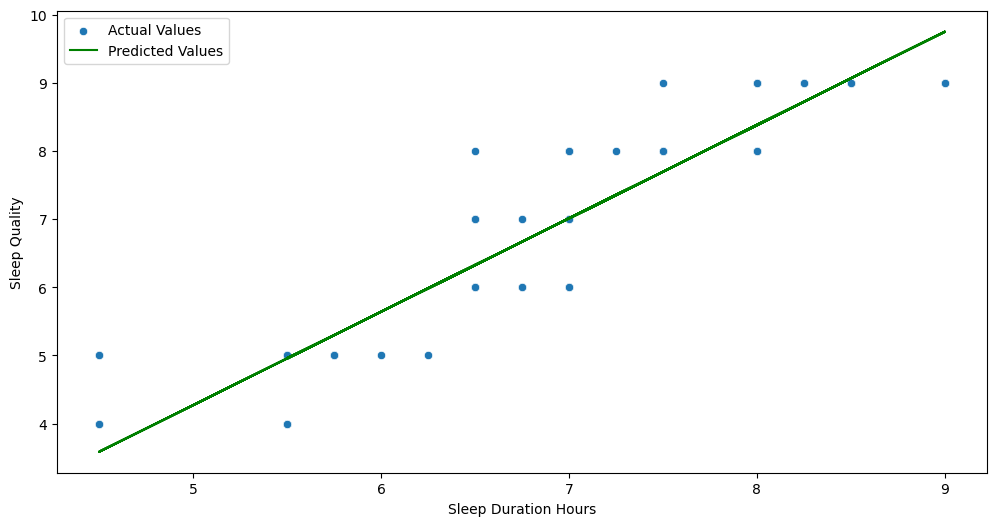

In [47]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df, label = 'Actual Values')
plt.plot(x, predictions, color = 'green', label = 'Predicted Values')
plt.legend()
plt.show()

In [ ]:
df.head()

## **Sleep Disorders vs Sleep Quality**

<Axes: xlabel='Sleep Disorders', ylabel='Sleep Quality'>

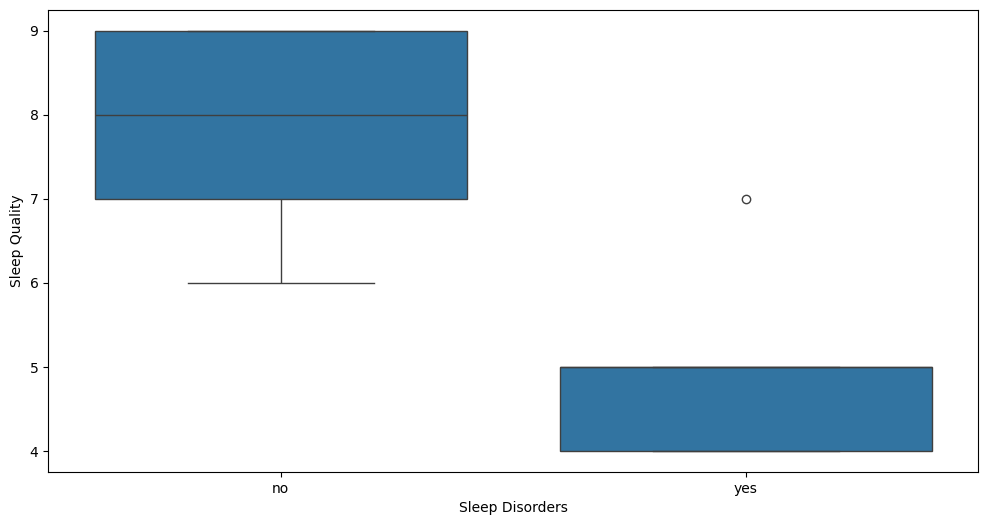

In [48]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = "Sleep Disorders", y = "Sleep Quality", data = df)
plt.show()

In [49]:
df_numeric_features = df.select_dtypes(include = ['int64', 'float64'])
df_numeric_features.head()

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Sleep Duration Hours
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5


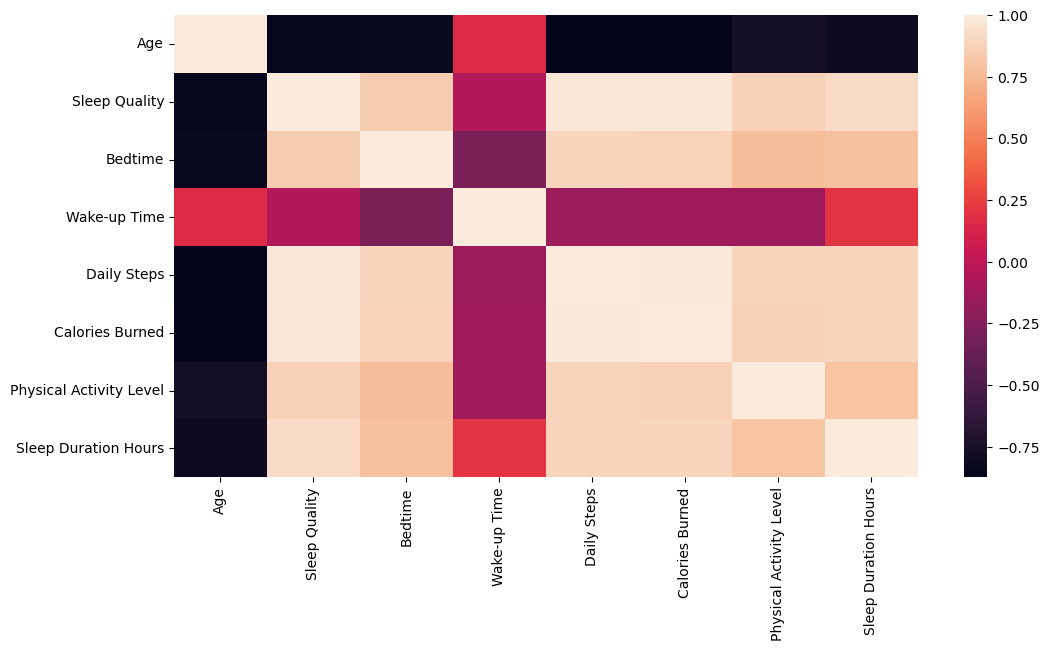

In [50]:
plt.figure (figsize = (12, 6))
sns.heatmap(df_numeric_features.corr())
plt.show()

## **Medication vs Sleep Quality**

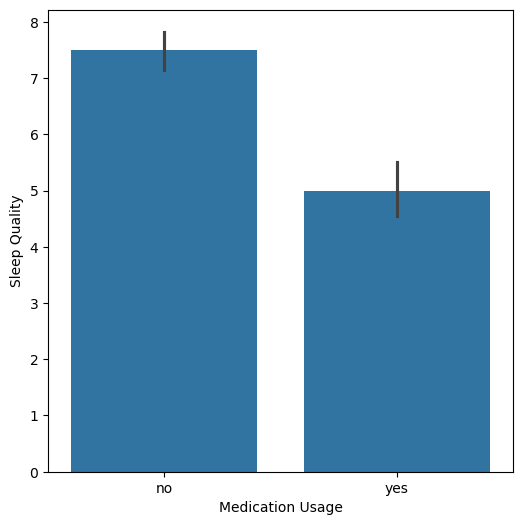

In [51]:
plt.figure (figsize = (6, 6))
sns.barplot(x = 'Medication Usage', y = 'Sleep Quality', data = df)
plt.show()

In [52]:
medication_quality = df[df['Medication Usage'] == 'yes']['Sleep Quality']
no_medication_quality = df[df['Medication Usage'] == 'no']['Sleep Quality']

t_statistic, p_value = stats.ttest_ind(medication_quality, no_medication_quality, equal_var=False)

print(f't-test Statistic for Sleep Quality: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

t-test Statistic for Sleep Quality: -8.08
p-value: 0.0000


## **Overall Summary**

In [53]:
df_numerics = df.select_dtypes(include = ['number'])
corr = df_numerics.corr()

print(corr['Sleep Quality'].sort_values(ascending=False))

Sleep Quality              1.000000
Daily Steps                0.976277
Calories Burned            0.973557
Sleep Duration Hours       0.918909
Physical Activity Level    0.875203
Bedtime                    0.853312
Wake-up Time              -0.048526
Age                       -0.848356
Name: Sleep Quality, dtype: float64


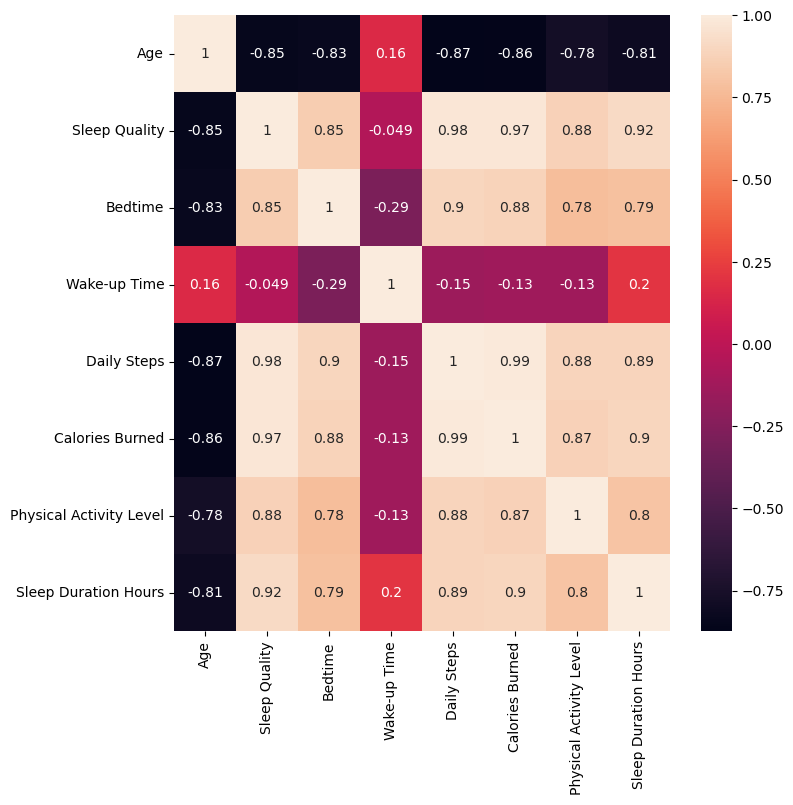

In [54]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()